# Epileptic Seizure Recognition Data Set 


## Ομάδα Α29
## Φωτεινή Στρατή 03113001
## Κοσμάς Στεφανόπουλος 03113098

## 1.Εισαγωγή Dataset

To [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) που επεξεργαζόμαστε σε αυτή την άσκηση έχει προκύψει από τη συνένωση 5 διαφορετικών dataset, τα οποία περιλαμβάνουν καταγραφές της εγκεφαλικής δραστηριότητας ασθενών για 23.5 sec. To ενιαίο dataset που εξετάζουμε περιλαμβάνει 11500 δείγματα(500 άτομα * 23 σύνολα μετρήσεων/άτομο) και 178 χαρακτηριστικά. Το κάθε χαρακτηριστικό αναπαριστά την τιμή του εγκεφαλογραφήματος για 1 sec. 

Οι τιμές των χαρακτηριστικών του dataset είναι ακέραιοι αριθμοί, ενώ δεν υπάρχουν μη διατεταγμένα χαρακτηριστικά.
Όπως είπαμε και παραπάνω, το Epileptic Seizure Recognition Data Set προέκυψε από τη συνένωση 5 διαφορετικών datasets. Συνεπώς, υπάρχουν 5 κλάσεις οι οποίες συμβολίζονται με τους αριθμούς 1,2,3,4,5 και βρίσκονται στην τελευταία στήλη του dataset. 
Οι στήλες και οι γραμμές του dataset είναι αριθμημένες. Ο τίτλος στην αρχή κάθε στήλης αναπαριστά ένα από τα 178 features, ενώ ο τίτλος στην αρχη κάθε γραμμής αναπαριστά την τιμή ενός από τα 23 σύνολα για ένα από τα 500 άτομα .

Στη συνέχεια, εισάγουμε το dataset στο notebook:

In [290]:
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package

from io import StringIO
import requests
import json
import pandas as pd
import numpy


# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_32ec1f0398634e35bbfa6b37fec2e635(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_db257ebff076e5af1f80ab731e6fd39ee8564add','domain': {'id': 'e804d8bdc63a4706b779dbd2f16ecde3'},
            'password': 'GMljd7(Yq!eGC819'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

data_1 = get_object_storage_file_with_credentials_32ec1f0398634e35bbfa6b37fec2e635('execise1', 'esr.csv')

 


Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s653-bbdcd845a65a2b-8dae92f2c105/.local/lib/python2.7/site-packages
Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s653-bbdcd845a65a2b-8dae92f2c105/.local/lib/python2.7/site-packages


Στο dataset δεν υπάρχουν απουσάζουσες τιμές. Όπως προαναφέραμε, η πρώτη γραμμή του dataset είναι οι επικεφαλίδες των στηλών, άρα θα πρέπει να την παραλέιψουμε.Επίσης, θα πρέπει να αγνοήσουμε και την 1η στήλη. Στη συνέχεια τυπώνουμε το πλήθος των δειγμάτων που ανήκουν σε κάθεμια από τις 5 κλάσεις και το ποσοστό της κάθε κλάσης επί του συνόλου:

In [291]:
dataset = pd.read_csv(data_1, header=None)
data=dataset.drop(dataset.index[0])

# Organize our data
labels_df = data.iloc[:, [179]]
features_df = data.iloc[:, 1:178]
# μετατρέπουμε το dataframe σε numpy array
np_features = features_df.values
# μετατρέπουμε το dataframe σε μονοδιάστατο array
np_labels1 = labels_df.values.flatten()
np_labels=  np_labels1.astype(int)
print "frequencies:", numpy.bincount(np_labels)
print "percentage:", numpy.bincount(np_labels)*100.0/np_labels.shape

frequencies: [   0 2300 2300 2300 2300 2300]
percentage: [  0.  20.  20.  20.  20.  20.]


Όπως αναφέρεται και στην περιγραφή του dataset, μόνο τα δείγματα που ανήκουν στην κλάση 1 έχουν επιληπτική κρίση. Συνεπώς, μπορούμε να ορίσουμε 2 νέα labels: **0** και **1**, όπου το 0 θα περιλαμβάνει τα δείγματα χωρίς επιληπτική κρίση(δηλαδή τις κλάσεις 2,3,4,5) και το 1 θα περιλαμβάνει τα δείγματα με επιληπτική κρίση(κλάση 1). Στη συνέχεια τυπώνουμε το πλήθος των δειγμάτων που ανήκουν σε κάθε μια από τις 2 νέες κλάσεις και το ποσοστό της κάθε κλάσης επί του συνόλου:

In [292]:
mapping={'1':1, 1:1, '2':0, 2:0, '3':0, 3:0, '4':0, 4:0, '5':0, 5:0}
labels_df = labels_df.replace(mapping)

# μετατρέπουμε το dataframe σε μονοδιάστατο array
np_labels1 = labels_df.values.flatten()
np_labels=  np_labels1.astype(int)
print "frequencies:", numpy.bincount(np_labels)
print "percentage:", numpy.bincount(np_labels)*100.0/np_labels.shape

frequencies: [9200 2300]
percentage: [ 80.  20.]


Βλέπουμε λοιπόν ότι ο λόγος των κλάσεων είναι 4:1, συνεπώς το δείγμα είναι μη ισορροπημένο. Στη συνέχεια, θα χωρίσουμε το δείγμα μας σε training και test set(30%) αντίστοιχα.

In [296]:
from sklearn.model_selection import train_test_split

#split dataset
train, test, train_labels, test_labels = train_test_split(features_df, np_labels, test_size=0.3)
print train.shape
print train_labels.shape
print test.shape
print test_labels.shape

(8050, 177)
(8050,)
(3450, 177)
(3450,)


## 2.Baseline Classification

Αρχικά, θα εκπαιδεύσουμε dummy classifiers, τον Gaussian Naives Bayes, έναν knn classifier και έναν MLP με default τιμές. Θα χρησιμοποιήσουμε το test set που έχουμε ορίσει. Τα αποτελέσματα για τις μετρικές f1-macro και f1-weighted παρουσιάζονται και με τη μορφή διαγραμμάτων:

In [297]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

esr_predictions={}
esr_macro={}
esr_weighted={}

#dummy classifiers
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

#train and test dummy classifiers
model = dc_uniform.fit(train, train_labels)
esr_predictions['uniform']= dc_uniform.predict(test)
print("Uniform classifier ")
print(confusion_matrix(test_labels,esr_predictions['uniform']))
esr_macro['uniform']=precision_recall_fscore_support(test_labels,esr_predictions['uniform'],average='macro')
esr_weighted['uniform']=precision_recall_fscore_support(test_labels,esr_predictions['uniform'],average='weighted')
print classification_report(test_labels, esr_predictions['uniform'])


model = dc_constant_0.fit(train, train_labels)
esr_predictions['constant 0']=dc_constant_0.predict(test)
print("Constant_0 classifier ")
print(confusion_matrix(test_labels,esr_predictions['constant 0']))
esr_macro['constant 0']=precision_recall_fscore_support(test_labels,esr_predictions['constant 0'],average='macro')
esr_weighted['constant 0']=precision_recall_fscore_support(test_labels,esr_predictions['constant 0'],average='weighted')
print classification_report(test_labels, esr_predictions['constant 0'])


model = dc_constant_1.fit(train, train_labels)
esr_predictions['constant 1']=dc_constant_1.predict(test)
print("Constant_1 classifier ")
print(confusion_matrix(test_labels,esr_predictions['constant 1']))
esr_macro['constant 1']=precision_recall_fscore_support(test_labels,esr_predictions['constant 1'],average='macro')
esr_weighted['constant 1']=precision_recall_fscore_support(test_labels,esr_predictions['constant 1'],average='weighted')
print classification_report(test_labels, esr_predictions['constant 1'])


model = dc_most_frequent.fit(train, train_labels)
esr_predictions['most frequent label']=dc_most_frequent.predict(test)
print("Most Frequent Label Classifier ")
print(confusion_matrix(test_labels,esr_predictions['most frequent label']))
esr_macro['most frequent label']=precision_recall_fscore_support(test_labels,esr_predictions['most frequent label'],average='macro')
esr_weighted['most frequent label']=precision_recall_fscore_support(test_labels,esr_predictions['most frequent label'],average='weighted')
print classification_report(test_labels, esr_predictions['most frequent label'])


model = dc_stratified.fit(train, train_labels)
esr_predictions['stratified']=dc_stratified.predict(test)
print("Stratified ")
print(confusion_matrix(test_labels,esr_predictions['stratified']))
esr_macro['stratified']=precision_recall_fscore_support(test_labels,esr_predictions['stratified'],average='macro')
esr_weighted['stratified']=precision_recall_fscore_support(test_labels,esr_predictions['stratified'],average='weighted')
print classification_report(test_labels, esr_predictions['stratified'])


Uniform classifier 
[[1408 1374]
 [ 340  328]]
             precision    recall  f1-score   support

          0       0.81      0.51      0.62      2782
          1       0.19      0.49      0.28       668

avg / total       0.69      0.50      0.55      3450

Constant_0 classifier 
[[2782    0]
 [ 668    0]]
             precision    recall  f1-score   support

          0       0.81      1.00      0.89      2782
          1       0.00      0.00      0.00       668

avg / total       0.65      0.81      0.72      3450

Constant_1 classifier 
[[   0 2782]
 [   0  668]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2782
          1       0.19      1.00      0.32       668

avg / total       0.04      0.19      0.06      3450

Most Frequent Label Classifier 
[[2782    0]
 [ 668    0]]
             precision    recall  f1-score   support

          0       0.81      1.00      0.89      2782
          1       0.00      0.00      0.00

In [298]:
#gaussian naives bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)
esr_predictions['gaussian naive bayes'] = gnb.predict(test)

print("Gaussian Naive Bayes ")
print(confusion_matrix(test_labels,esr_predictions['gaussian naive bayes']))

esr_macro['gaussian naive bayes']=precision_recall_fscore_support(test_labels,esr_predictions['gaussian naive bayes'],average='macro')
esr_weighted['gaussian naive bayes']=precision_recall_fscore_support(test_labels,esr_predictions['gaussian naive bayes'],average='weighted')
print classification_report(test_labels, esr_predictions['gaussian naive bayes'])


Gaussian Naive Bayes 
[[2712   70]
 [  79  589]]
             precision    recall  f1-score   support

          0       0.97      0.97      0.97      2782
          1       0.89      0.88      0.89       668

avg / total       0.96      0.96      0.96      3450



In [300]:
#Knn Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() #by default neighbors=5

model = knn.fit(train, train_labels)
esr_predictions['Knn'] = knn.predict(test)

print("Knn ")
print(confusion_matrix(test_labels,esr_predictions['Knn']))

esr_macro['Knn']=precision_recall_fscore_support(test_labels,esr_predictions['Knn'],average='macro')
esr_weighted['Knn']=precision_recall_fscore_support(test_labels,esr_predictions['Knn'],average='weighted')
print classification_report(test_labels, esr_predictions['Knn'])

Knn 
[[2777    5]
 [ 268  400]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95      2782
          1       0.99      0.60      0.75       668

avg / total       0.93      0.92      0.91      3450



In [302]:
#MLP Classifier
from sklearn.neural_network import MLPClassifier

model = clf.fit(train, train_labels)
esr_predictions['mlp']=clf.predict(test)
print("MLP ")
print(confusion_matrix(test_labels,esr_predictions['mlp']))

esr_macro['mlp']=precision_recall_fscore_support(test_labels,esr_predictions['mlp'],average='macro')
esr_weighted['mlp']=precision_recall_fscore_support(test_labels,esr_predictions['mlp'],average='weighted')
print classification_report(test_labels, esr_predictions['mlp'])

MLP 
[[2294  488]
 [ 157  511]]
             precision    recall  f1-score   support

          0       0.94      0.82      0.88      2782
          1       0.51      0.76      0.61       668

avg / total       0.85      0.81      0.83      3450




Results of f1-weighted average on the Epileptic Seizure Recognition Dataset

constant 1: (0.037489939088426801, 0.19362318840579709, 0.062817042183133789, None)
uniform: (0.68684405029843298, 0.50318840579710145, 0.55486447471209488, None)
stratified: (0.69073508378031279, 0.68492753623188407, 0.68778505678300672, None)
constant 0: (0.65024356227683267, 0.80637681159420294, 0.71994232665438784, None)
most frequent label: (0.65024356227683267, 0.80637681159420294, 0.71994232665438784, None)
mlp: (0.85376444153873055, 0.81304347826086953, 0.82569182089935667, None)
Knn: (0.92663783804746647, 0.92086956521739127, 0.91295761142661624, None)
gaussian naive bayes: (0.95660833433975878, 0.95681159420289852, 0.95670001077191646, None)

Results of f1-macro average on the Epileptic Seizure Recognition Dataset

constant 1: (0.096811594202898546, 0.5, 0.1622146673142302, None)
constant 0: (0.40318840579710147, 0.5, 0.44640564826700901, None)
most frequent label: (0.40318840579710147, 0.5, 0.44640

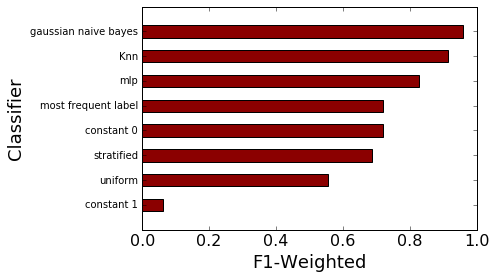

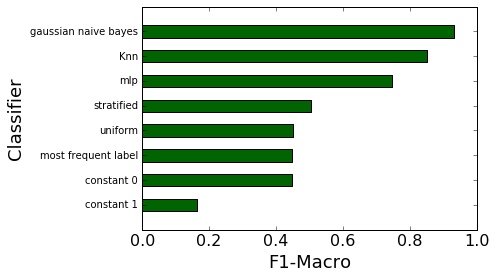

In [305]:
#print results
B=[]
S1=[]
print "\nResults of f1-weighted average on the Epileptic Seizure Recognition Dataset\n"
for key, value in sorted(esr_weighted.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   B.append(value[2])
   S1.append(key)
    
C=[]
S2=[]
print "\nResults of f1-macro average on the Epileptic Seizure Recognition Dataset\n"
for key, value in sorted(esr_macro.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   C.append(value[2])
   S2.append(key)
     
#plot f1-weighted
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.5
bar_l = numpy.arange(1,9)
tick_pos = [i + (0.05 / 8) for i in bar_l]

ax1 = ax.barh(bar_l,B,height=bar_width,color='darkred',align='center')
ax.set_xlabel("F1-Weighted", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S1, fontsize=10)
plt.xticks(fontsize=16)
plt.show()

#plot f1-macro
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.5
bar_l = numpy.arange(1,9)
tick_pos = [i + (0.05 / 8) for i in bar_l]

ax1 = ax.barh(bar_l,C,height=bar_width,color='darkgreen',align='center')
ax.set_xlabel("F1-Macro", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S2, fontsize=10)
plt.xticks(fontsize=16)
plt.show()

Από τα παραπάνω διαγράμματα παρατηρούμε ότι ο gaussian naive bayes έχει την καλύτερη απόδοση, και στις 2 μετρικές, ενώ ο mlp για τις default παραμέτρους, παρουσιάζει μέτρια απόδοση. Δεύτερος έρχεται ο Κnn με τον default αριθμό γειτόνων. Από τους dummy classifiers, αυτός με τη χειρότερη απόδοση είναι ο constant 1, ενώ οι υπόλοιποι παρουσιάζουν παρόμοια συμπεριφορά.

## 3.Βελτιστοποίηση Ταξινομητών

Σε αυτό το τμήμα της άσκησης, θα προσπαθήσουμε να βελτιώσουμε την απόδοσή των Classifiers στο training set μέσω της διαδικασίας
προεπεξεργασίας και εύρεσης βέλτιστων υπερπαραμέτρων. Για το σκοπό αυτό, θα χρησιμοποιήσουμε τις τεχνικές του pipeline και του gridsearchv. H αναζήτηση των βέλτιστων παραμέτρων των μετασχηματιστών και των βέλτιστων υπερπαραμέτρων των εκτιμητών θα γίνει με την τεχνική 5-fold cross-validation. Όσον αφορά το κομμάτι της προεπεξεργασίας, θα χρησιμοποιήσουμε την τεχνική **OverSampling** για την εξισρρόπηση του δείγματος, την τεχνική **PCA** για την ανάλυση σε κύριες συνιστώσες,ένα κατώφλι **Variance Threshold** για την επιλογή χαρακτηριστικών.

In [307]:
from imblearn.pipeline import Pipeline

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA

selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()
pca = PCA()

from sklearn.model_selection import GridSearchCV
vthreshold = [0,0.1] #scaler
n_components = [20,30,40] #pca final features

Επειδή το μέγεθος του dataset είναι πολύ μεγάλο(ειδικά για τον knn και τον mlp), θα δουλέψουμε με λιγότερα δείγματα. Το ανακατεύουμε και παίρνουμε ένα μικρό αριθμό samples

In [309]:
from sklearn.utils import shuffle
sdata = shuffle(dataset, random_state=341976)
samples = 1000
labels_df = sdata.iloc[0:samples, [179]]
features_df = sdata.iloc[0:samples, 1:178]
# μετατρέπουμε το dataframe σε numpy array
np_features = features_df.values
# μετατρέπουμε το dataframe σε μονοδιάστατο array
np_labels1 = labels_df.values.flatten()
np_labels=  np_labels1.astype(int)
print np_labels.shape

(1000,)


Κάνουμε πάλι μετατροπή κλάσεων και τυπώνουμε τις αντίστοιχες συχνότητες, από τις οποίες βλέπουμε πάλι ότι το δείγμα είναι μη ισορροπημένο:

In [310]:
mapping={'1':1, 1:1, '2':0, 2:0, '3':0, 3:0, '4':0, 4:0, '5':0, 5:0}
labels_df = labels_df.replace(mapping)

np_labels1 = labels_df.values.flatten()
np_labels=  np_labels1.astype(int)
print np_labels.shape
print "frequencies:", numpy.bincount(np_labels)
print "percentage:", numpy.bincount(np_labels)*100.0/np_labels.shape

(1000,)
frequencies: [806 194]
percentage: [ 80.6  19.4]


Χωρίζουμε και πάλι το δείγμα σε train και test set και επιβεβαιώνουμε ότι οι διαστάσεις τους είναι εντάξει.

In [311]:
train, test, train_labels, test_labels = train_test_split(features_df, np_labels, test_size=0.3)
print train.shape
print train_labels.shape
print test.shape
print test_labels.shape

(700, 177)
(700,)
(300, 177)
(300,)


Για τους  dummy classifiers  και τον Gaussinan Naive Bayes δεν χρειάζεται να κάνουμε αναζήτηση υπερπαραμέτρων:

In [313]:
esr_predictions_opt={}
esr_macro_opt={}
esr_weighted_opt={}

#dummy classifiers
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

##uniform
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('uniform', dc_uniform)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=1)
estimator1.fit(train, train_labels)
esr_predictions_opt['uniform_macro'] = estimator1.predict(test)
print("Uniform classifier with gridsearcv at f1-macro ")
print(confusion_matrix(test_labels,esr_predictions_opt['uniform_macro']))
print classification_report(test_labels, esr_predictions_opt['uniform_macro'])
esr_macro_opt['uniform_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['uniform_macro'],average='macro')
esr_weighted_opt['uniform_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['uniform_macro'],average='weighted')

dc_uniform = DummyClassifier(strategy="uniform")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('uniform', dc_uniform)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_weighted', n_jobs=1)
estimator1.fit(train, train_labels)
esr_predictions_opt['uniform_weighted'] = estimator1.predict(test)
print("Uniform classifier with gridsearcv at f1-weighted ")
print(confusion_matrix(test_labels,esr_predictions_opt['uniform_weighted']))
print classification_report(test_labels, esr_predictions_opt['uniform_macro'])
esr_macro_opt['uniform_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['uniform_weighted'],average='macro')
esr_weighted_opt['uniform_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['uniform_weighted'],average='weighted')

##constant 0 
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('constant_0', dc_constant_0)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['constant 0_macro'] = estimator.predict(test)
print("Constant 0 Classifier with gridsearchv at f1-macro ")
print(confusion_matrix(test_labels,esr_predictions_opt['constant 0_macro']))
print classification_report(test_labels, esr_predictions_opt['constant 0_macro'])
esr_macro_opt['constant 0_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 0_macro'],average='macro')
esr_weighted_opt['constant 0_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 0_macro'],average='weighted')

dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('constant_0', dc_constant_0)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_weighted', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['constant 0_weighted'] = estimator.predict(test)
print("Constant 0 Classifier with gridsearchv at f1-weighted ")
print(confusion_matrix(test_labels,esr_predictions_opt['constant 0_weighted']))
print classification_report(test_labels, esr_predictions_opt['constant 0_weighted'])
esr_macro_opt['constant 0_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 0_weighted'],average='macro')
esr_weighted_opt['constant 0_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 0_weighted'],average='weighted')

##constant 1
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('constant_1', dc_constant_1)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['constant 1_macro'] = estimator.predict(test)
print("Constant 1 Classifier with gridsearchv at f1-macro  ")
print(confusion_matrix(test_labels,esr_predictions_opt['constant 1_macro']))
print classification_report(test_labels, esr_predictions_opt['constant 1_macro'])
esr_macro_opt['constant 1_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 1_macro'],average='macro')
esr_weighted_opt['constant 1_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 1_macro'],average='weighted')

dc_constant_0 = DummyClassifier(strategy="constant", constant=1)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('constant_1', dc_constant_1)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_weighted', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['constant 1_weighted'] = estimator.predict(test)
print("Constant 1 Classifier with gridsearchv at f1-weighted  ")
print(confusion_matrix(test_labels,esr_predictions_opt['constant 1_weighted']))
print classification_report(test_labels, esr_predictions_opt['constant 1_weighted'])
esr_macro_opt['constant 1_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 1_weighted'],average='macro')
esr_weighted_opt['constant 1_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['constant 1_weighted'],average='weighted')

##most frequent
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('most_frequent', dc_most_frequent)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['most frequent label_macro'] =estimator.predict(test)
print("Most frequent Label Classifier with gridsearchv at f1-macro ")
print(confusion_matrix(test_labels,esr_predictions_opt['most frequent label_macro']))
print classification_report(test_labels, esr_predictions_opt['most frequent label_macro'])
esr_macro_opt['most frequent label_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['most frequent label_macro'],average='macro')
esr_weighted_opt['most frequent label_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['most frequent label_macro'],average='weighted')

dc_most_frequent = DummyClassifier(strategy="most_frequent")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('most_frequent', dc_most_frequent)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_weighted', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['most frequent label_weighted'] =estimator.predict(test)
print("Most frequent Label Classifier with gridsearchv at f1-weighted ")
print(confusion_matrix(test_labels,esr_predictions_opt['most frequent label_weighted']))
print classification_report(test_labels, esr_predictions_opt['most frequent label_weighted'])
esr_macro_opt['most frequent label_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['most frequent label_weighted'],average='macro')
esr_weighted_opt['most frequent label_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['most frequent label_weighted'],average='weighted')

##stratified
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('stratified', dc_stratified)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['stratified_macro'] = estimator.predict(test)
print("Stratified classifier with gridsearchv at f1-macro ")
print(confusion_matrix(test_labels,esr_predictions_opt['stratified_macro']))
print classification_report(test_labels, esr_predictions_opt['stratified_macro'])
esr_macro_opt['stratified_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['stratified_macro'],average='macro')
esr_weighted_opt['stratified_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['stratified_macro'],average='weighted')

dc_stratified = DummyClassifier(strategy="stratified")
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('stratified', dc_stratified)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_weighted', n_jobs=1)
estimator.fit(train, train_labels)
esr_predictions_opt['stratified_weighted'] = estimator.predict(test)
print("Stratified classifier with gridsearchv at f1-weighted ")
print(confusion_matrix(test_labels,esr_predictions_opt['stratified_weighted']))
print classification_report(test_labels, esr_predictions_opt['stratified_weighted'])
esr_macro_opt['stratified_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['stratified_weighted'],average='macro')
esr_weighted_opt['stratified_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['stratified_weighted'],average='weighted')

Uniform classifier with gridsearcv at f1-macro 
[[121 124]
 [ 26  29]]
             precision    recall  f1-score   support

          0       0.82      0.49      0.62       245
          1       0.19      0.53      0.28        55

avg / total       0.71      0.50      0.56       300

Uniform classifier with gridsearcv at f1-weighted 
[[114 131]
 [ 29  26]]
             precision    recall  f1-score   support

          0       0.82      0.49      0.62       245
          1       0.19      0.53      0.28        55

avg / total       0.71      0.50      0.56       300

Constant 0 Classifier with gridsearchv at f1-macro 
[[245   0]
 [ 55   0]]
             precision    recall  f1-score   support

          0       0.82      1.00      0.90       245
          1       0.00      0.00      0.00        55

avg / total       0.67      0.82      0.73       300

Constant 0 Classifier with gridsearchv at f1-weighted 
[[245   0]
 [ 55   0]]
             precision    recall  f1-score   support

   

In [322]:
import time

gnb = GaussianNB()

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=1)
time1=time.time()
estimator1.fit(train, train_labels)
time2=time.time()
time3=time2-time1
time1=time.time()
esr_predictions_opt['gaussian naives bayes_macro'] = estimator1.predict(test)
time2=time.time()
time4=time2-time1
print("Gaussinan Naives Bayes Classifier with gridsearcv at f1-macro ")
print(confusion_matrix(test_labels,esr_predictions_opt['gaussian naives bayes_macro']))
print classification_report(test_labels, esr_predictions_opt['gaussian naives bayes_macro'])
print ("Training time: " + str(time3))
print ("Testing time: " + str(time4))
esr_macro_opt['gaussian naives bayes_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['gaussian naives bayes_macro'],average='macro')
esr_weighted_opt['gaussian naives bayes_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['gaussian naives bayes_macro'],average='weighted')
print estimator.best_estimator_
print estimator.best_params_

gnb = GaussianNB()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('gnb', gnb)], memory = 'tmp')
estimator1 = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_weighted', n_jobs=1)
time1=time.time()
estimator1.fit(train, train_labels)
time2=time.time()
time3=time2-time1
time1=time.time()
esr_predictions_opt['gaussian naives bayes_weighted'] = estimator1.predict(test)
time2=time.time()
time4=time2-time1
print("\nGaussinan Naives Bayes classifier with gridsearcv at f1-weighted ")
print(confusion_matrix(test_labels,esr_predictions_opt['gaussian naives bayes_weighted']))
print classification_report(test_labels, esr_predictions_opt['gaussian naives bayes_weighted'])
print ("Training time: " + str(time3))
print ("Testing time: " + str(time4))
esr_macro_opt['gaussian naives bayes_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['gaussian naives bayes_weighted'],average='macro')
esr_weighted_opt['gaussian naives bayes_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['gaussian naives bayes_weighted'],average='weighted')
print estimator.best_estimator_
print estimator.best_params_

Gaussinan Naives Bayes Classifier with gridsearcv at f1-macro 
[[242   3]
 [  6  49]]
             precision    recall  f1-score   support

          0       0.98      0.99      0.98       245
          1       0.94      0.89      0.92        55

avg / total       0.97      0.97      0.97       300

Training time: 14.2214910984
Testing time: 0.0073390007019
Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform'))])
{'pca__n_components': 20, 'kNN__metric': 'euclidean', 'kNN__weights': 'uniform', 'kNN__n_neighbors': 3, 'selector__thres

Στον Knn Classifier θα πειραματιστούμε με την τιμή του k(αριθμός γειτόνων), το πεδίο weights και το πεδίο metric:

In [326]:
#knn classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_jobs=-1)

k=[1, 3, 5, 7, 10, 15]
weights=['uniform', 'distance']
metric=['euclidean', 'manhattan', 'chebyshev']
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)])
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__weights=weights, kNN__metric=metric), cv=5, scoring='f1_macro', n_jobs=1)
time1=time.time()
estimator.fit(train, train_labels)
time2=time.time()
time3=time2-time1
time1=time.time()
esr_predictions_opt['knn_macro'] = estimator.predict(test)
time2=time.time()
time4=time2-time1
print("Knn classifier with gridsearchv at f1-macro ")
print(confusion_matrix(test_labels,esr_predictions_opt['knn_macro']))
print classification_report(test_labels, esr_predictions_opt['knn_macro'])
print ("Training time: " + str(time3))
print ("Testing time: " + str(time4))
esr_macro_opt['knn_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['knn_macro'],average='macro')
esr_weighted_opt['knn_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['knn_macro'],average='weighted')
print estimator.best_estimator_
print estimator.best_params_

clf = neighbors.KNeighborsClassifier(n_jobs=-1)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('kNN', clf)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k, kNN__weights=weights, kNN__metric=metric), cv=5, scoring='f1_weighted', n_jobs=1)
time1=time.time()
estimator.fit(train, train_labels)
time2=time.time()
time3=time2-time1
time1=time.time()
esr_predictions_opt['knn_weighted'] = estimator.predict(test)
time2=time.time()
time4=time2-time1
print("\nKnn classifier with gridsearchv at f1-weighted ")
print(confusion_matrix(test_labels,esr_predictions_opt['knn_weighted']))
print classification_report(test_labels, esr_predictions_opt['knn_weighted'])
print ("Training time: " + str(time3))
print ("Testing time: " + str(time4))
esr_macro_opt['knn_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['knn_weighted'],average='macro')
esr_weighted_opt['knn_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['knn_weighted'],average='weighted')
print estimator.best_estimator_
print estimator.best_params_

Knn classifier with gridsearchv at f1-macro 
[[243   2]
 [ 19  36]]
             precision    recall  f1-score   support

          0       0.93      0.99      0.96       245
          1       0.95      0.65      0.77        55

avg / total       0.93      0.93      0.92       300

Training time: 845.07555604
Testing time: 0.233909845352
Pipeline(memory=None,
     steps=[('selector', VarianceThreshold(threshold=0.1)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='distance'))])
{'pca__n_components': 20, 'kNN__metric': 'euclidean', 'kNN__weights': 'distance', 'kNN__n_neighbors': 5, 'selector__threshold': 0.1}

Knn 

Τέλος, πειραματιζόμαστε με τον MLP Classifier. Από τα προηγούμενα αποτελέσματα είδαμε ότι η καλύτερη τιμή της παράμετρου των τελικών features για το pca είναι 20, γι'αυτό και θα τρέξουμε το GridSearch για αυτή την τιμή. Για το πεδίο activation, χρησιμοποιήσαμε τις τιμές: 'identity', 'logistic', 'tanh', 'relu' και είδαμε ότι τα καλύτερα scores επιτυγχάνονταν με τη μέθοδο 'relu'. Ομοίως στην περίπτωση του learning_rate δοκιμάσαμε τις μεθόδους: 'constant', 'invscaling', 'adaptive' και καταλήξαμε στην μέθοδο 'constant'. Επίσης, παρατηρήσαμε ότι η καλύτερη απόδοση επιτυγχάνεται όταν το hidden_layer_size παίρνει τιμές στο διάστημα [15,22]. Στη συνέχεια παρουσιάζουμε τη διαδικασία αναζήτησης βέλτιστων υπερπαραμέτρων για τον Mlp με βάση όσα αναφέραμε παραπάνω.

In [327]:
n_components=[20]

#Mlp classifier
hidden_layer_sizes=[16,17,18,19,20]
activation=['relu']
solver=['lbfgs']
max_iter=[350,400]
learning_rate=['constant']
alpha=[0.0001,0.001,0.01,0.1]

clf = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', clf)])
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, mlp__hidden_layer_sizes =hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__alpha=alpha, mlp__learning_rate=learning_rate, mlp__max_iter=max_iter ), cv=5, scoring='f1_macro', n_jobs=1)
time1=time.time()
estimator.fit(train, train_labels)
time2=time.time()
time3=time2-time1
time1=time.time()
esr_predictions_opt['mlp_macro'] = estimator.predict(test)
time2=time.time()
time4=time2-time1
print("Mlp classifier with gridsearchv at f1-macro ")
print(confusion_matrix(test_labels,esr_predictions_opt['mlp_macro']))
print classification_report(test_labels, esr_predictions_opt['mlp_macro'])
print ("Training time: " + str(time3))
print ("Testing time: " + str(time4))
esr_macro_opt['mlp_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['mlp_macro'],average='macro')
esr_weighted_opt['mlp_macro']=precision_recall_fscore_support(test_labels,esr_predictions_opt['mlp_macro'],average='weighted')
print estimator.best_estimator_
print estimator.best_params_

clf = MLPClassifier()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('pca', pca), ('mlp', clf)])
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, mlp__hidden_layer_sizes =hidden_layer_sizes, mlp__activation=activation, mlp__solver=solver, mlp__alpha=alpha, mlp__learning_rate=learning_rate, mlp__max_iter=max_iter ), cv=5, scoring='f1_weighted', n_jobs=1)
time1=time.time()
estimator.fit(train, train_labels)
time2=time.time()
time3=time2-time1
time1=time.time()
esr_predictions_opt['mlp_weighted'] = estimator.predict(test)
time2=time.time()
time4=time2-time1
print("\nMlp classifier with gridsearchv at f1-weighted ")
print(confusion_matrix(test_labels,esr_predictions_opt['mlp_weighted']))
print classification_report(test_labels, esr_predictions_opt['mlp_weighted'])
print ("Training time: " + str(time3))
print ("Testing time: " + str(time4))
esr_macro_opt['mlp_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['mlp_weighted'],average='macro')
esr_weighted_opt['mlp_weighted']=precision_recall_fscore_support(test_labels,esr_predictions_opt['mlp_weighted'],average='weighted')
print estimator.best_estimator_
print estimator.best_params_

Mlp classifier with gridsearchv at f1-macro 
[[244   1]
 [ 10  45]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       245
          1       0.98      0.82      0.89        55

avg / total       0.96      0.96      0.96       300

Training time: 782.000636101
Testing time: 0.0680129528046
Pipeline(memory=None,
     steps=[('selector', VarianceThreshold(threshold=0.1)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('pca', PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0...True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])
{'mlp__activation': 'relu', 'mlp__alpha': 0.1, 'mlp__hidden_layer_sizes': 18, 'pca__n_components': 20, 'mlp__solver': 'lbfgs', 'mlp__learning_rate': 'constant', 'selector__threshold': 0.1, 'mlp__max_iter': 350}

Mlp classifier


Results with f1-weighted average on the ESR Dataset

constant 1_macro: (0.033611111111111105, 0.18333333333333332, 0.0568075117370892, None)
constant 1_weighted: (0.033611111111111105, 0.18333333333333332, 0.0568075117370892, None)
uniform_weighted: (0.68140988523154122, 0.46666666666666667, 0.52486546067561435, None)
uniform_macro: (0.70697167755991297, 0.5, 0.55528846153846156, None)
stratified_macro: (0.70385778333854665, 0.52666666666666662, 0.58017537622941096, None)
stratified_weighted: (0.76111457036114583, 0.56999999999999995, 0.61830322073841326, None)
constant 0_macro: (0.66694444444444445, 0.81666666666666665, 0.7342507645259938, None)
constant 0_weighted: (0.66694444444444445, 0.81666666666666665, 0.7342507645259938, None)
most frequent label_macro: (0.66694444444444445, 0.81666666666666665, 0.7342507645259938, None)
most frequent label_weighted: (0.66694444444444445, 0.81666666666666665, 0.7342507645259938, None)
knn_weighted: (0.9264466057569507, 0.92666666666666664, 0.9

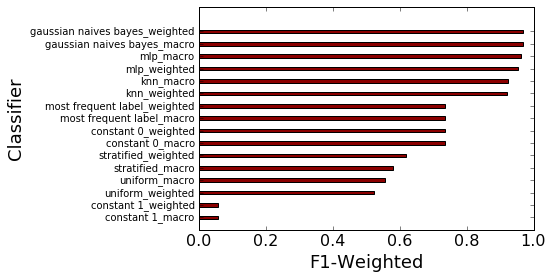

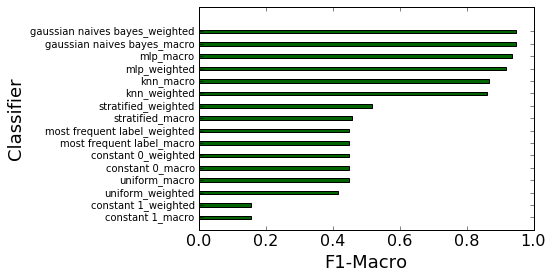

In [329]:
#print results
B=[]
S1=[]
print "\nResults with f1-weighted average on the ESR Dataset\n"
for key, value in sorted(esr_weighted_opt.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   B.append(value[2])
   S1.append(key)
 
C=[]
S2=[]
print "\nResults with f1-macro average on the ESR Dataset\n"
for key, value in sorted(esr_macro_opt.iteritems(), key=lambda (k,v): (v[2],k)):
   print "%s: %s" % (key, value)
   C.append(value[2])
   S2.append(key)
    
#plot f1-weighted
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.3
bar_l = numpy.arange(1,17)
tick_pos = [i + (0.05 / 16) for i in bar_l]

ax1 = ax.barh(bar_l,B,height=bar_width,color='darkred',align='center')
ax.set_xlabel("F1-Weighted", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S1, fontsize=10)
plt.xticks(fontsize=16)
plt.show()

#plot f1-macro
fig= plt.figure(facecolor="white")
ax = fig.add_subplot(1,1,1)
bar_width=0.3
bar_l = numpy.arange(1,17)
tick_pos = [i + (0.05 / 16) for i in bar_l]

ax1 = ax.barh(bar_l,C,height=bar_width,color='darkgreen',align='center')
ax.set_xlabel("F1-Macro", fontsize=18)
ax.set_ylabel("Classifier", fontsize=18)
ax.legend(loc="best")
plt.yticks(tick_pos,S2, fontsize=10)
plt.xticks(fontsize=16)
plt.show()